In [1]:
from src.shockwave_drawer import ShockwaveDrawer
from src.fundamental_diagram import FundamentalDiagram
from src.augmenters.traffic_light import TrafficLight

%load_ext autoreload
%autoreload 2

In [2]:
freeflow_speed = 2

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Fundamental Diagram'}, xlabel='Density (veh / m)', ylabel='Capacity (veh / s)'>)

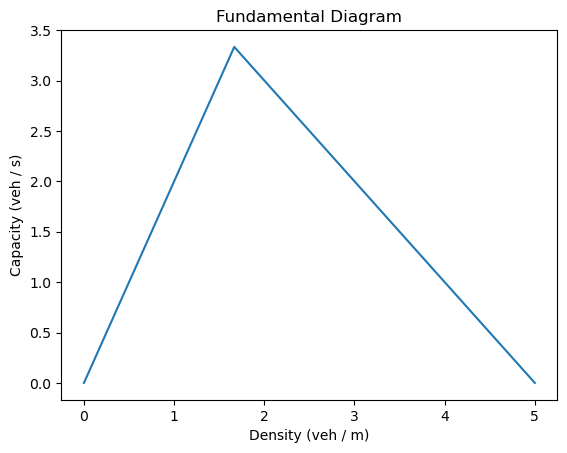

In [3]:
diagram = FundamentalDiagram(freeflow_speed, 5, 1)
diagram.show()

In [4]:
lights = []
lights.append(TrafficLight(10, [5, 5], [0, 1]))
lights.append(TrafficLight(30, cycles=[5, 5], blocking_states=[1, 0]))

In [5]:
simul_time = 25
drawer = ShockwaveDrawer(diagram, simul_time, lights, 1)
drawer.run()

processing CapacityEvent(point=dtPoint(time=0, position=30), type=<EventType.capacity: 2>, priority=2, prior_capacity=-1, posterior_capacity=0, interface=<src.drawer_utils.Interface object at 0x0000027E38CD0E90>)
processing CapacityEvent(point=dtPoint(time=5, position=10), type=<EventType.capacity: 2>, priority=2, prior_capacity=-1, posterior_capacity=0, interface=<src.drawer_utils.Interface object at 0x0000027E36229B80>)
processing CapacityEvent(point=dtPoint(time=5, position=30), type=<EventType.capacity: 2>, priority=2, prior_capacity=0, posterior_capacity=-1, interface=<src.drawer_utils.Interface object at 0x0000027E38CD0E90>)
processing IntersectionEvent(point=dtPoint(time=9.999999999999998, position=25.0), type=<EventType.intersection: 1>, priority=1, interfaces=[<src.drawer_utils.Interface object at 0x0000027E374D44D0>, <src.drawer_utils.Interface object at 0x0000027E38CC2CF0>])
processing CapacityEvent(point=dtPoint(time=10, position=10), type=<EventType.capacity: 2>, priority=

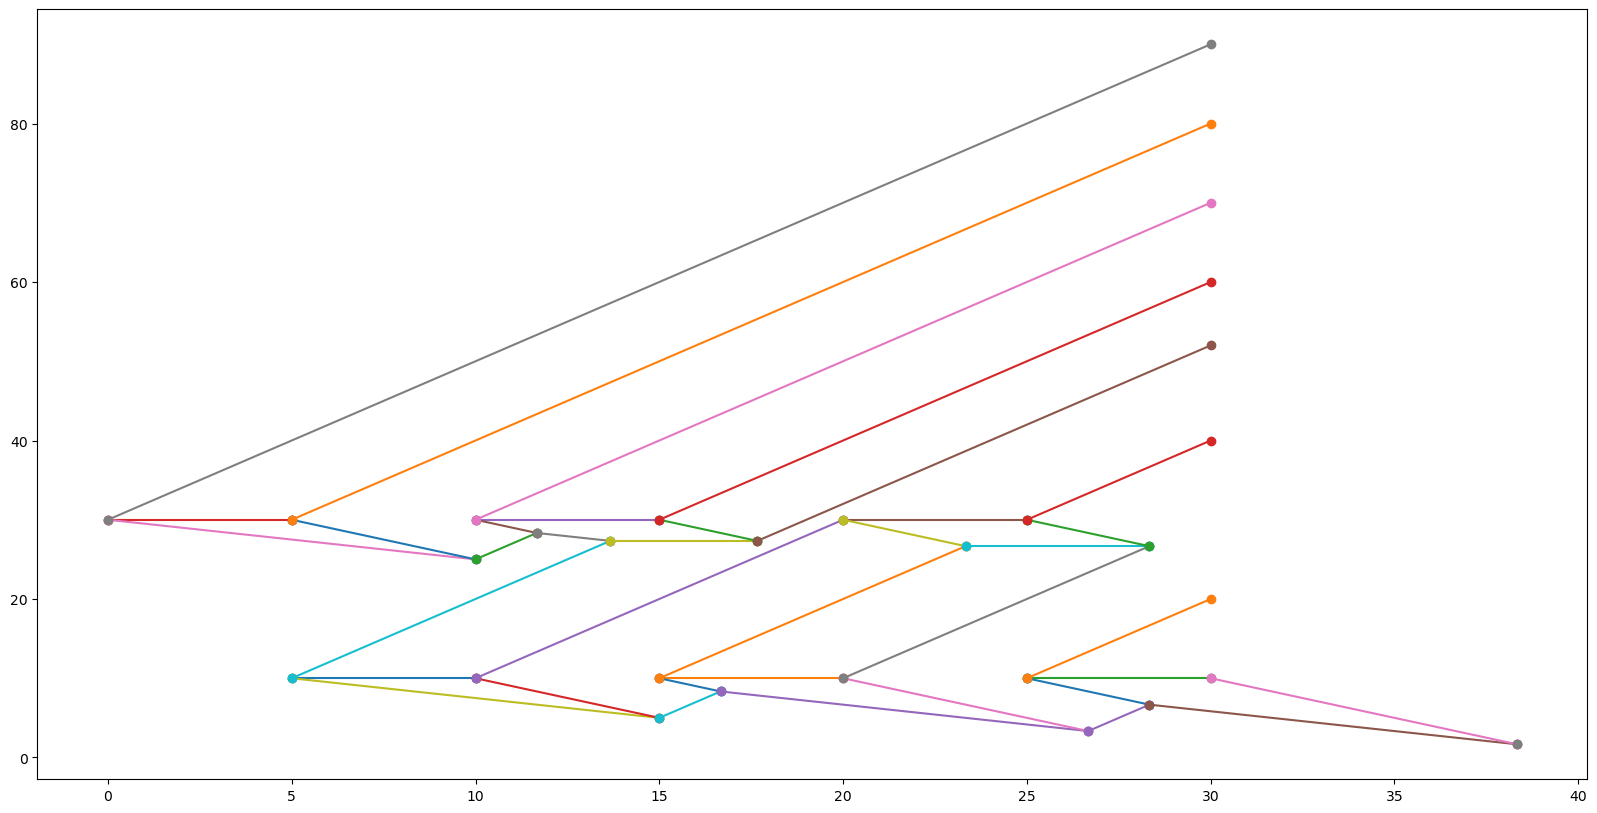

In [6]:
drawer.figures[-1][0]

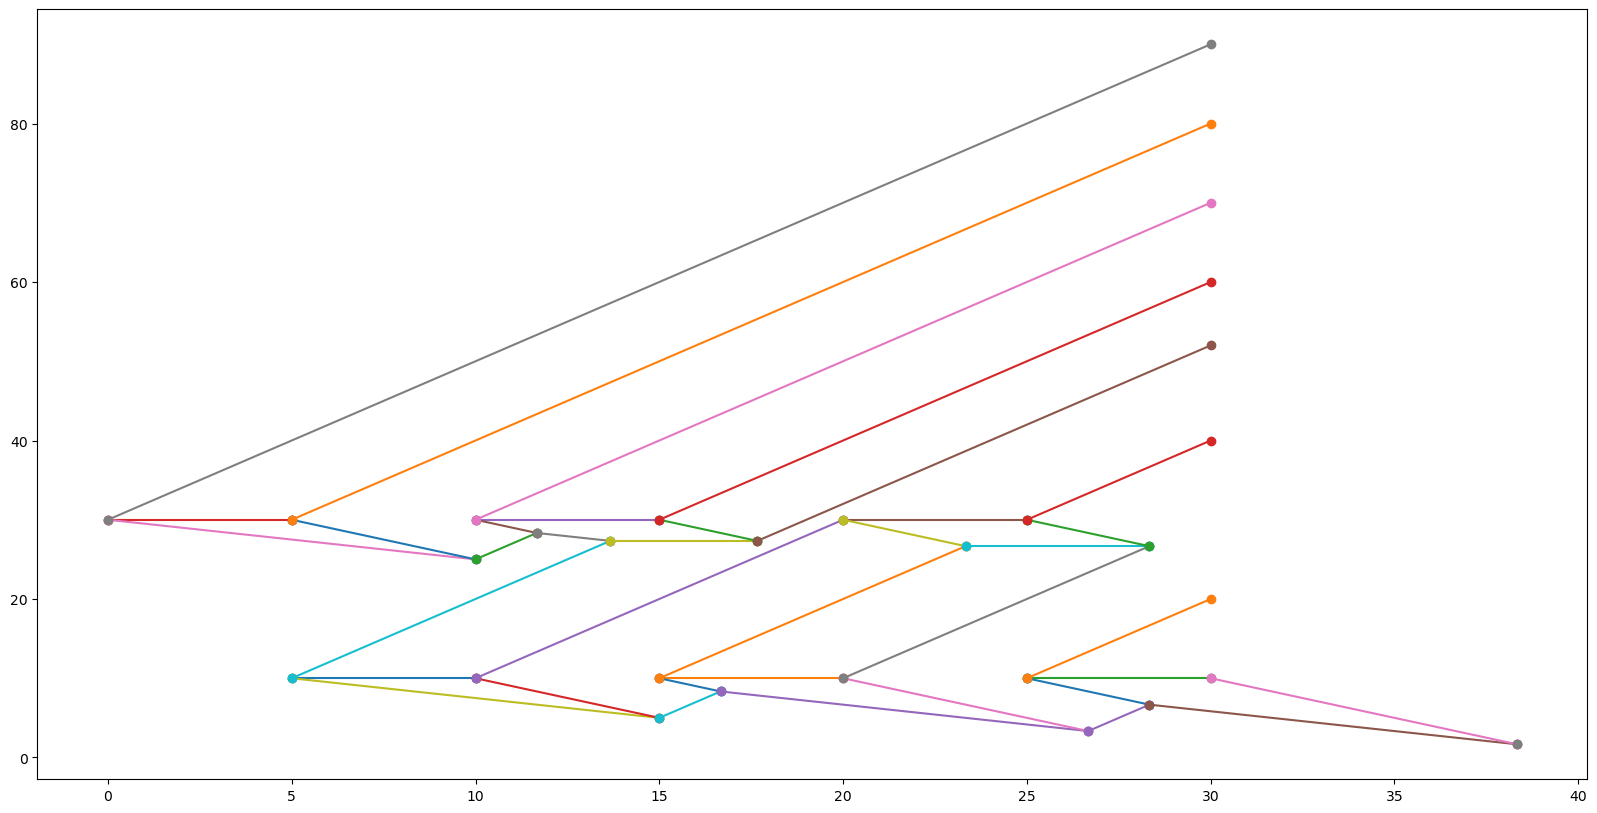

In [7]:
import matplotlib.pyplot as plt

from src.drawer_utils import dtPoint

fig, ax = plt.subplots(figsize=(20, 10))

max_time = -1

for interface in drawer.interfaces:
    p1 = interface.endpoints[0]
    p2 = interface.endpoints[1]

    if p2 is not None:
        max_time = max(max_time, p2.time)

    if p1 is None:
        p1 = dtPoint(0, interface.get_pos_at_time(0))
    if p2 is None:
        p2 = dtPoint(simul_time + 5, interface.get_pos_at_time(simul_time + 5))

    if p1 != p2:
        ax.plot((p1.time, p2.time), (p1.position, p2.position), marker="o")

In [8]:
for i, (fig, ax) in enumerate(drawer.figures):
    ax.set_xbound(-5, max_time + 5)
    ax.set_ybound(-5, freeflow_speed * max_time)
    fig.savefig(f"data/{i}.png")


In [12]:
!ffmpeg -framerate 1 -i data/%d.png -c:v libx264 -pix_fmt yuv420p -filter:v "setpts=PTS-STARTPTS" data/out.mp4 -y

ffmpeg version git-2020-07-27-16c2ed4 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --en

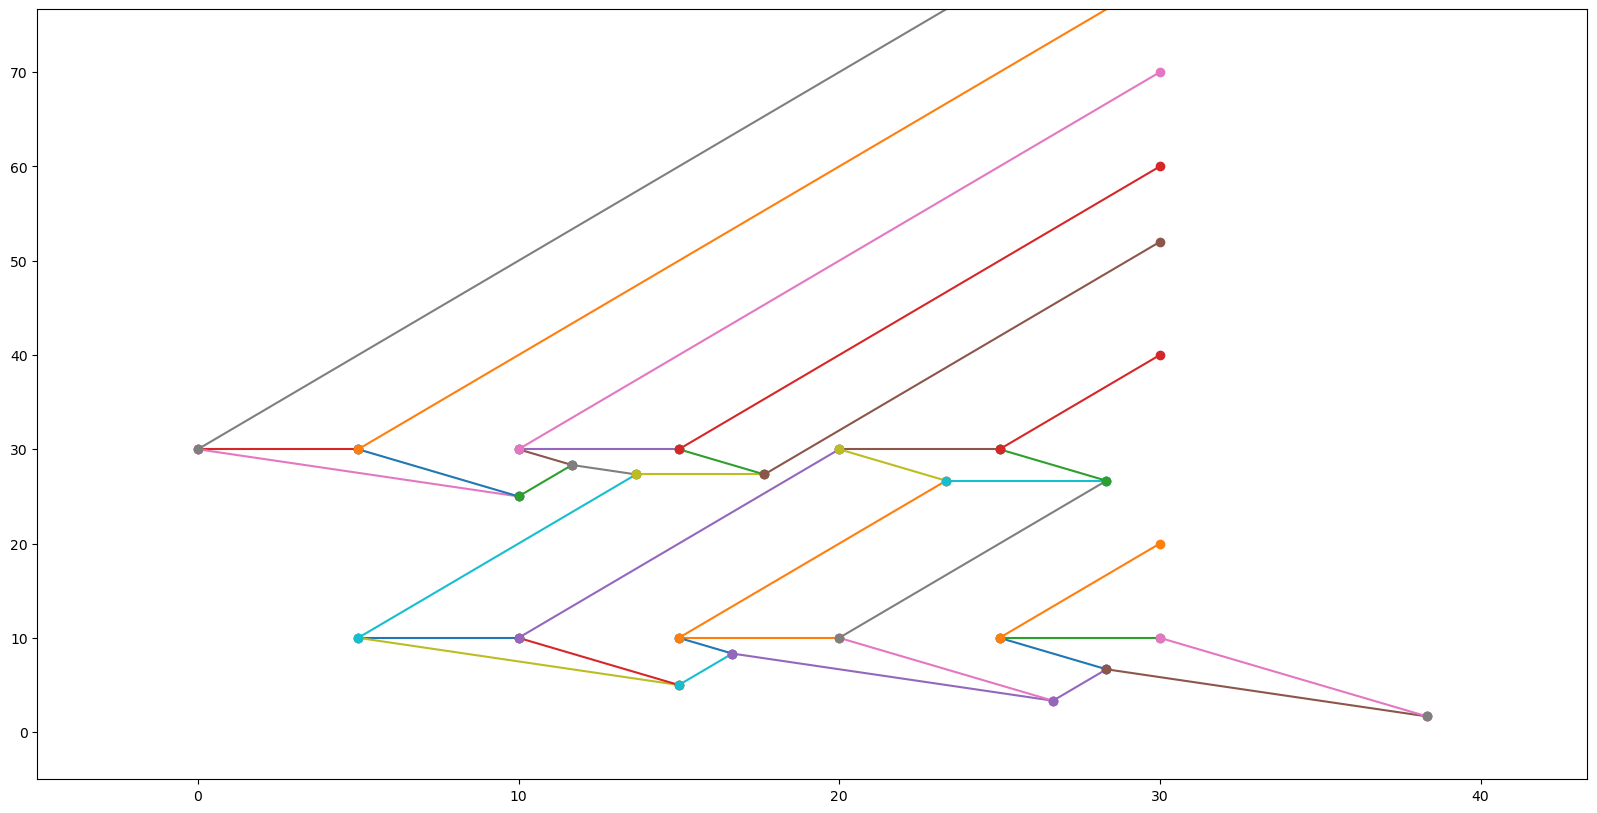

In [9]:
from IPython.display import display, clear_output
from time import sleep
import matplotlib.pyplot as plt

for i in range(len(drawer.figures)):
    clear_output(wait=True)

    display(drawer.figures[i][0])
    plt.close()  # .close prevents the normal figure display at end of cell execution

    sleep(0.5)